# Missing Data
To deal with missing data we must first understand how much data is missing and in what variables.
The worst variables are:
- Workoverload (1087 missing values : 70.27%)
- Working_ability (1042 missing values : 67.36%)
- Trauma (680 missing values : 43.96%)
- Relationship_with_colleagues (567 missing values : 36.65%)

We also have 2 other variables with high percentage of missing data, but these are low enough that imputation can be considered
- Inccordination (230 missing values : 14.87%)
- Irrational_Thoughts_Work (183 missing values : 11.83%)

All other variables have 0 or lower percentage of missing data, as such they are good candidates for imputation.

For each of the first 4 variables we must consider if it's worth to keep or delete the variable from our study

In [1]:
# Import libraries
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from matplotlib import pyplot as plt #used for plots
import seaborn as sns
import datawig
from importlib import reload

In [2]:
# Fetch Data
data = pd.read_csv('../data/RA_data.csv')
data.describe()
data.head()

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Workoverload,Familiy_history,Depression,Extremely_nervous,Stress,...,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,working_ability,Paidwork
0,1,1.0,10.0,0,1,NaN,0,0,0.0,0,...,1,NaN,0,8,8,7,6,6,NaN,0
1,3,1.0,10.0,0,1,0.0,1,0,0.0,1,...,1,1.0,7,8,7,4,0,0,7.0,1
2,1,1.0,10.0,0,1,NaN,0,0,6.0,1,...,1,0.0,3,5,0,2,0,3,NaN,0
3,5,1.0,10.0,0,1,NaN,0,0,1.0,1,...,0,NaN,2,9,0,0,9,5,NaN,0
4,1,1.0,10.0,0,1,NaN,0,0,0.0,1,...,1,NaN,0,7,5,0,0,0,NaN,0


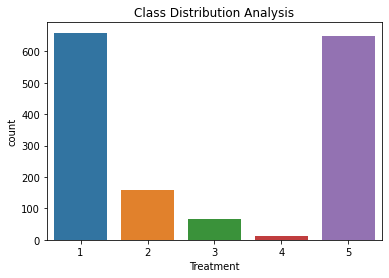

In [4]:
# Analyse class distribution
sns.countplot(x='Treatment',data = data)
plt.title('Class Distribution Analysis')
plt.show()

# We have class imbalance in our data, with treatment options 1 and 5 being a lot more used than 2, 3 and 4

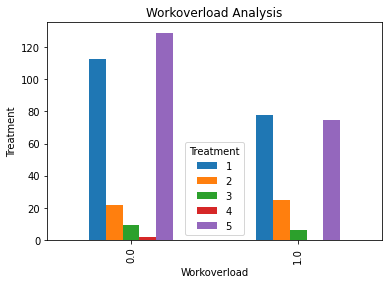

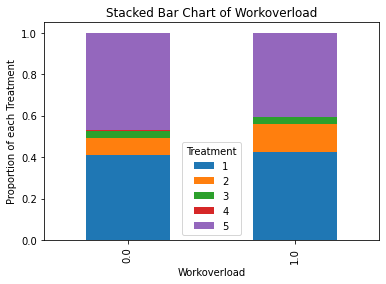

In [5]:
# Analysis for Workoverload
crosstab = pd.crosstab(data.Workoverload,data.Treatment).plot(kind='bar')
plt.title('Workoverload Analysis')
plt.xlabel('Workoverload')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Workoverload,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Workoverload')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

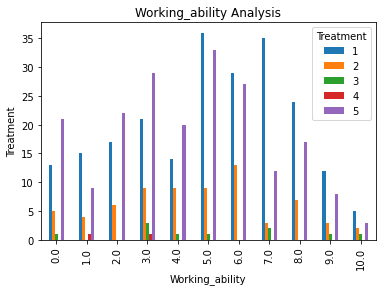

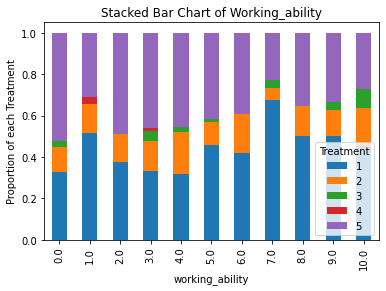

In [6]:
# Analysis for Working Ability
crosstab = pd.crosstab(data.working_ability,data.Treatment).plot(kind='bar')
plt.title('Working_ability Analysis')
plt.xlabel('Working_ability')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.working_ability,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Working_ability')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

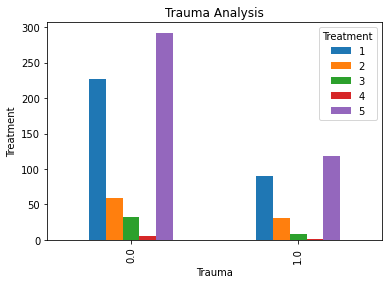

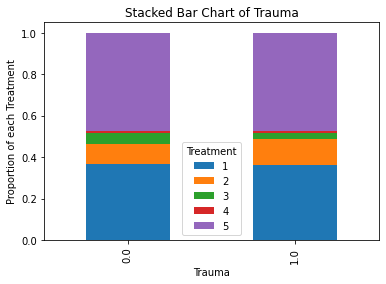

In [7]:
# Analysis for Trauma
crosstab = pd.crosstab(data.Trauma,data.Treatment).plot(kind='bar')
plt.title('Trauma Analysis')
plt.xlabel('Trauma')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Trauma,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Trauma')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

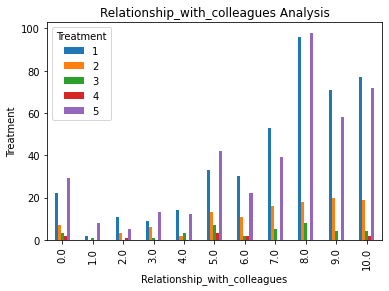

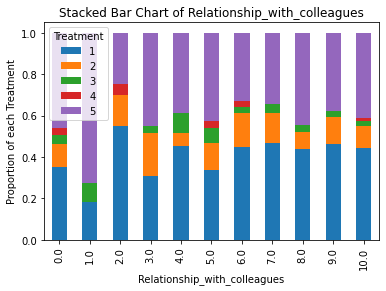

In [8]:
# Analysis for Relationship with colleagues
crosstab = pd.crosstab(data.Relationship_with_colleagues,data.Treatment).plot(kind='bar')
plt.title('Relationship_with_colleagues Analysis')
plt.xlabel('Relationship_with_colleagues')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Relationship_with_colleagues,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Relationship_with_colleagues')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

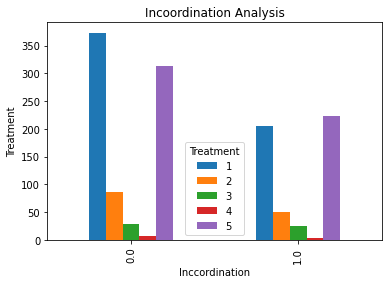

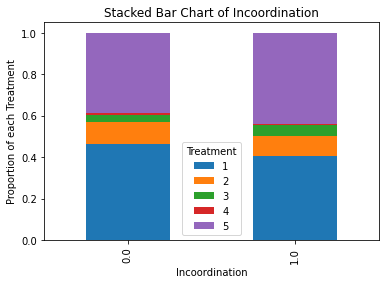

In [23]:
# Analysis for Incoordination
crosstab = pd.crosstab(data.Incoordination,data.Treatment).plot(kind='bar')
plt.title('Incoordination Analysis')
plt.xlabel('Inccordination')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Incoordination,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Incoordination')
plt.ylabel('Proportion of each Treatment')
plt.show()

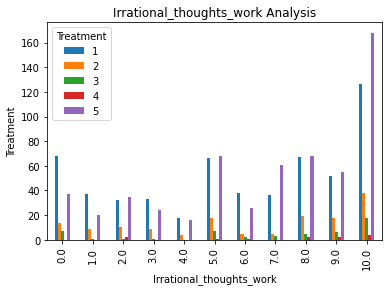

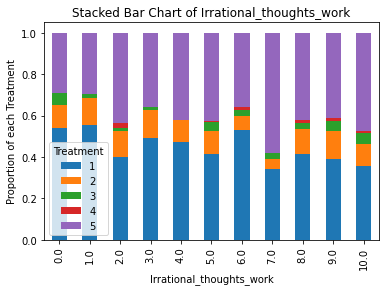

In [24]:
# Analysis for Irrational Thoughts Work
crosstab = pd.crosstab(data.Irrational_thoughts_work,data.Treatment).plot(kind='bar')
plt.title('Irrational_thoughts_work Analysis')
plt.xlabel('Irrational_thoughts_work')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Irrational_thoughts_work,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Irrational_thoughts_work')
plt.ylabel('Proportion of each Treatment')
plt.show()

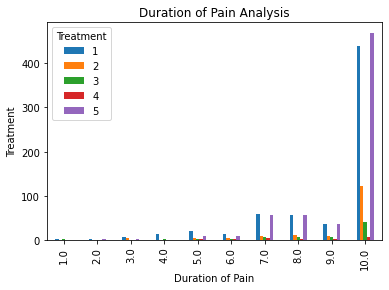

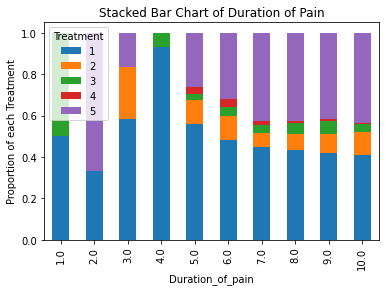

In [9]:
# Analysis for Duration of Pain
crosstab = pd.crosstab(data.Duration_of_pain,data.Treatment).plot(kind='bar')
plt.title('Duration of Pain Analysis')
plt.xlabel('Duration of Pain')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Duration_of_pain,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Duration of Pain')
plt.ylabel('Proportion of each Treatment')
plt.show()

In [3]:
# Drop columns
finalData = data.copy()
finalData.drop(labels='Workoverload',axis=1, inplace=True)
finalData.drop(labels='Relationship_with_colleagues',axis=1, inplace=True)
finalData.drop(labels='Trauma',axis=1, inplace=True)
finalData.drop(labels='working_ability',axis=1, inplace=True)

# Fill in data for the remaining missing values
finalDataImputed = datawig.SimpleImputer.complete(finalData)

finalDataImputed.head()

[16:42:17] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.
[16:42:17] ../src/executor/../operator/../common/utils.h:473: 
Storage type fallback detected:
operator = Concat
input storage types = [csr, default, ]
output storage types = [default, ]
params = {"num_args" : 2, "dim" : 1, }
context.dev_mask = cpu
The operator with default storage type will be dispatched for execution. You're seeing this warning message because the operator above is unable to process the given ndarrays with specified storage types, context and parameter. Temporary dense ndarrays are generated in order to execute the operator. This does not affect the correctness of the programme. You can set environment variable MXNET_STORAGE_FALLBACK_LOG_VERBOSE to 0 to suppress this warning.
[16:42:28] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.
[16:42:38] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.
[16:42:48] ../src/executor/gr

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,...,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1,1.0,10.0,0,1,0,0,0.0,0,9.0,...,1.0,1,0.909201,0,8,8,7,6,6,0
1,3,1.0,10.0,0,1,1,0,0.0,1,5.0,...,1.0,1,1.000000,7,8,7,4,0,0,1
2,1,1.0,10.0,0,1,0,0,6.0,1,8.0,...,0.0,1,0.000000,3,5,0,2,0,3,0
3,5,1.0,10.0,0,1,0,0,1.0,1,10.0,...,1.0,0,1.177749,2,9,0,0,9,5,0
4,1,1.0,10.0,0,1,0,0,0.0,1,7.0,...,0.0,1,0.731362,0,7,5,0,0,0,0


In [4]:
finalDataImputed.describe()
finalDataImputed.to_pickle('../data/finalData_1')

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,...,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,...,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.891979,0.272126,9.194411,0.301423,0.692109,0.256792,0.093790,3.124408,0.774256,6.924801,...,0.534067,0.892626,0.384739,1.596378,6.523933,0.706339,0.716041,2.805304,2.785899,0.328590
std,1.867272,0.443207,1.522810,0.459024,0.461771,0.437005,0.291631,3.069463,0.418207,2.438357,...,0.495400,0.309688,0.483258,2.764563,2.532330,1.967483,1.996168,3.454409,3.468595,0.469853
min,1.000000,-0.115481,1.000000,0.000000,0.000000,0.000000,0.000000,-6.174106,0.000000,-0.314700,...,-0.646623,0.000000,-0.848958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,7.000000,...,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,3.000000,8.000000,0.000000,0.000000,6.000000,6.000000,1.000000
max,5.000000,1.107052,11.882264,1.000000,1.000000,1.000000,1.000000,13.985542,1.000000,12.440437,...,1.204629,1.000000,1.835183,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
